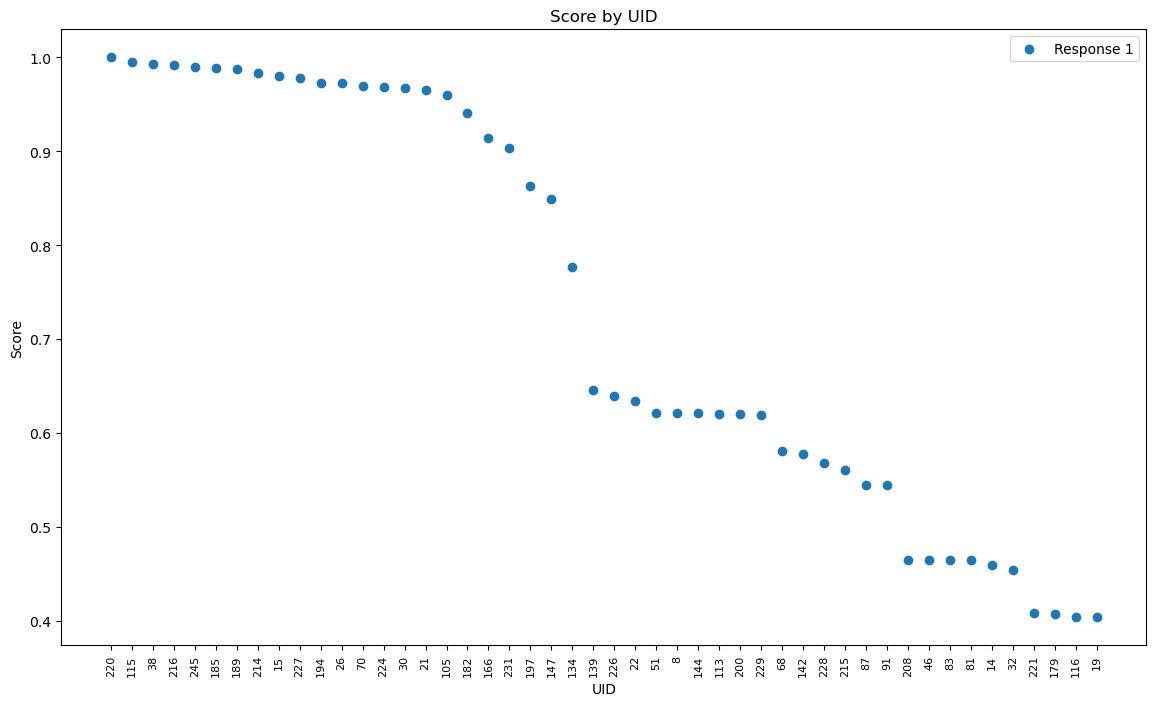

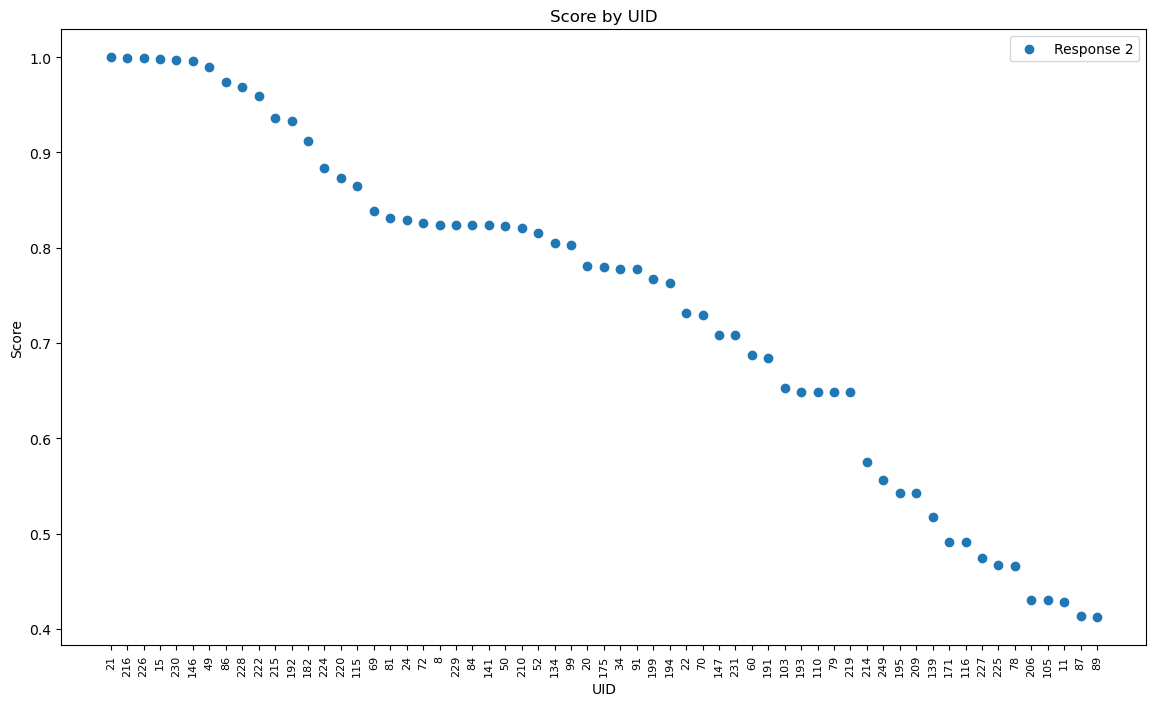

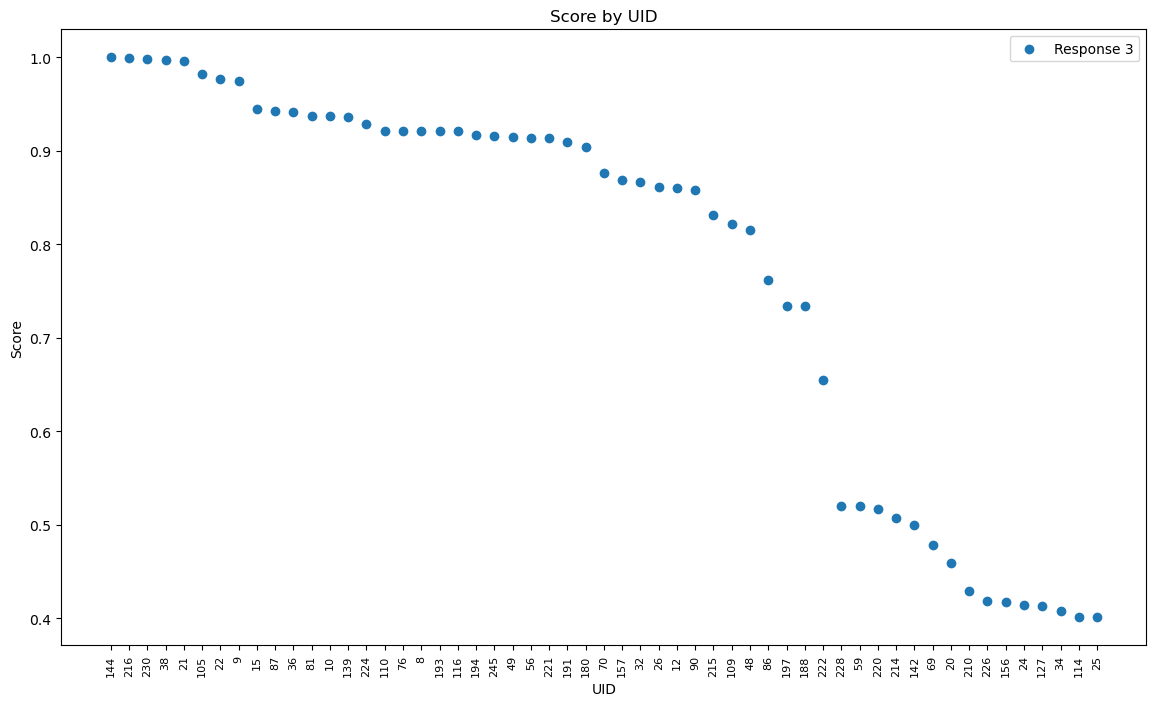

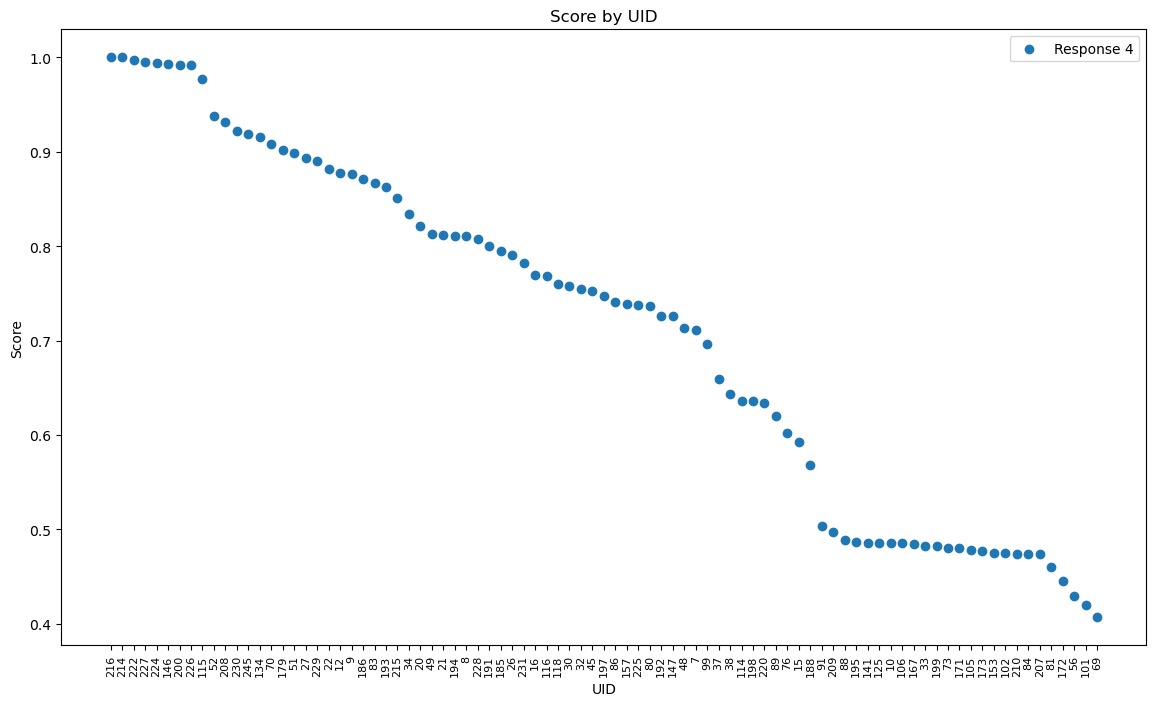

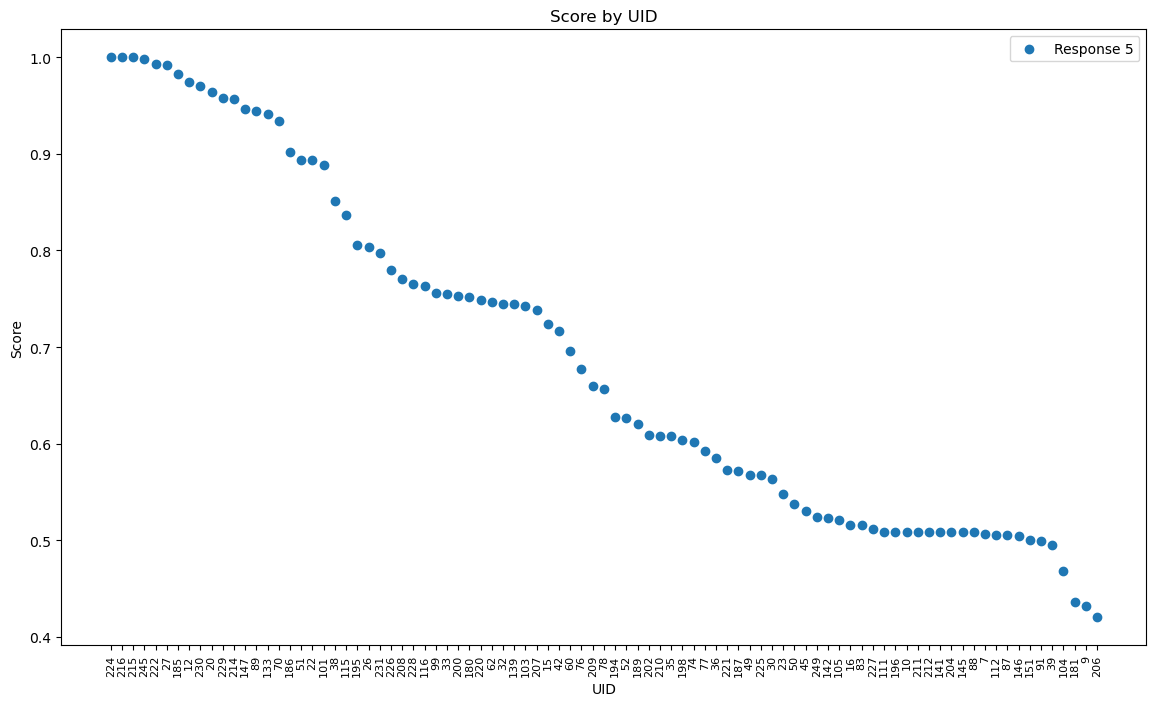

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import requests

responses = [
    requests.get("http://149.36.1.121:8000/scores"),
    requests.get("http://165.227.153.108:8000/scores"),
    requests.get("http://64.226.93.21:8000/scores"),
    requests.get("http://161.97.131.133:8000/scores"),
    requests.get("http://5.161.242.50:8000/scores")
]

for idx, response in enumerate(responses):
    scores = response.json()
    scores_df = []
    for i, data in enumerate(scores):
        if data > 0.4:
            scores_df.append({
                "score": data,
                "uid": str(i)
            })
    df = pd.DataFrame(scores_df)
    df = df.sort_values(by='score', ascending=False)
    plt.figure(figsize=(14, 8))
    plt.scatter(df['uid'], df['score'], label=f'Response {idx+1}')
    plt.xlabel('UID')
    plt.ylabel('Score')
    plt.title('Score by UID')
    plt.xticks(rotation=90, fontsize=8)
    plt.legend()
    
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>